## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mice_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_mice_df = merge_mice_df.rename(columns={"Mouse ID": "Mouse_ID"})
#merge_mice_df.head()

In [2]:
# Checking the number of mice in the DataFrame.
mice_grouped = merge_mice_df.groupby(["Mouse_ID"])
mice_df = mice_grouped.count()
mice_count = len(mice_df)
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = merge_mice_df[merge_mice_df.duplicated(subset=['Mouse_ID','Timepoint'], keep=False)]
duplicates_grouped = duplicates_df.groupby("Mouse_ID")
duplicate_count = duplicates_grouped.count()
duplicate_count = duplicate_count.index.tolist()

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = (merge_mice_df[~merge_mice_df.Mouse_ID.isin(duplicate_count)])

In [5]:
# Checking the number of mice in the clean DataFrame.
df_grouped = clean_df.groupby(["Mouse_ID"])
mice_df = df_grouped.count()
mice_count = len(mice_df)
mice_count

248

## Summary Statistics

In [6]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drugs_grouped = drug_df.groupby(["Drug Regimen"])
drug_list = drugs_grouped.mean()
drug_list = drug_list.rename(columns={"Tumor Volume (mm3)": "Tumor Mean (Avg.)"})
drug_list["Tumor Median"] = drugs_grouped.median()
drug_list["Tumor Variance"] = drugs_grouped.var()
drug_list["Std. Deviation"] = drugs_grouped.std()
drug_list["Std. Error of Mean"] = drugs_grouped.sem()
drug_list

,Tumor Mean (Avg.),Tumor Median,Tumor Variance,Std. Deviation,Std. Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Mice')

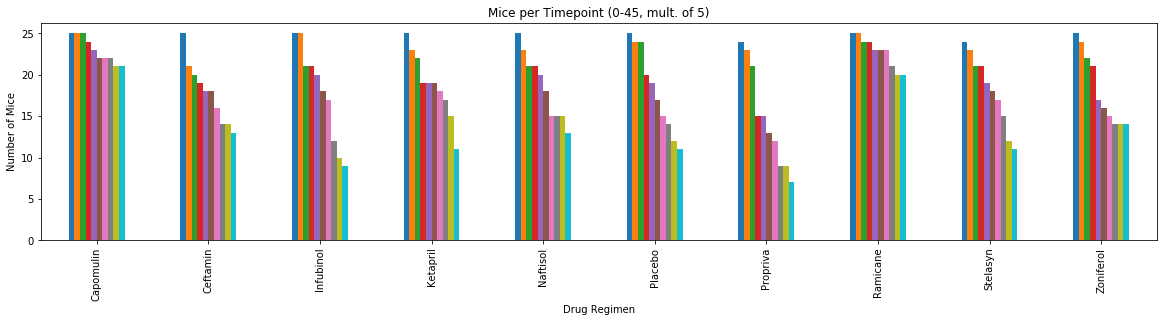

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment using pandas.
drug_and_time = clean_df[["Drug Regimen", "Mouse_ID", "Timepoint"]]
drug_time_grouped = drug_and_time.groupby(["Drug Regimen", "Timepoint"])
bar_df = drug_time_grouped.count()
mice_bar = bar_df.unstack().plot(kind="bar", legend= False, title="Mice per Timepoint (0-45, mult. of 5)", figsize=(20,4))
mice_bar.set_ylabel("Number of Mice")

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment using pyplot.
#plt.bar(bar_df["Timepoint"], bar_df["Mouse_ID"], color='r', alpha=0.5, align="edge")
#plt.title("Mice per Timepoint (0-45, multiples of 5) by Treatment")
#mice_bar.set_ylabel("Number of Mice")
#plt.show()
#plt.tight_layout()

## Pie Plots

Text(0, 0.5, 'Mice')

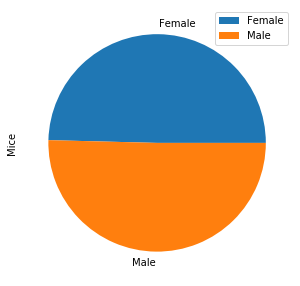

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex","Mouse_ID"])
gender_totals = gender_group.count()
gender_totals = gender_totals.reset_index(["Mouse_ID"])
gender_totals = gender_totals.reset_index(["Sex"])
pie_group = gender_totals.groupby(["Sex"])
pie_df = pie_group.count()
plot = pie_df.plot.pie(y="Mouse_ID",figsize=(5,5))
plot.set_ylabel("Mice")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_totals, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
